In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import pandas as pd
import scipy.stats as stats

import json, pickle
from tqdm import tqdm
import sys, os, pdb

from src.data_utils import ECoG_Data
import src.manifold_u as mu
import importlib
importlib.reload(mu)
import fig_utils as figu
importlib.reload(figu)

plt.style.use(['science', 'retro'])
sns.set_style("ticks")
plt.rcParams.update({"font.size": 10})

In [2]:
movement_colors, day_colors, participant_colors, exp_class_colors, exp_participant_colors, freq_colors = mu.get_all_colors()

In [3]:
cur_freq = 'Beta'
cur_freq_ind = 2
freq_red_dim = 10

In [4]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_nat_pose.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    nat_exp_params = json.load(f)
print(nat_exp_params['comment'])
nat_pats_ids_in = nat_exp_params['pats_ids_in']

Params for getting naturalistic pose data


In [5]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_exp_pose.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    exp_params = json.load(f)
print(exp_params['comment'])
exp_pats_ids_in = exp_params['pats_ids_in']
exp_new_pats_ids = {sbj:"E"+sbj[-2:] for sbj in exp_pats_ids_in}

Params for getting exp pose data


In [6]:
nat_sp = nat_exp_params['sp'] + nat_exp_params['dataset'] + nat_exp_params['experiment_folder']
exp_sp = exp_params['sp'] + exp_params['dataset'] + exp_params['experiment_folder']
print(nat_sp)
print(exp_sp)

/home/zsteineh/research_projects/neural_manifolds/results/nm/pose/nat_move_correl/
/home/zsteineh/research_projects/neural_manifolds/results/nm/pose/exp_move_correl/


In [7]:
# use this since the freq name was saved incorrectly
freq_map = {'LFO': 'Beta'}
nat_df = pd.read_csv(nat_sp + 'pose_vs_ecog_pearsonr.csv')
nat_df['Frequency'] = nat_df['Frequency'].map(freq_map)
print(nat_df.head())
exp_df = pd.read_csv(exp_sp + 'pose_vs_ecog_pearsonr.csv')
exp_df['Frequency'] = exp_df['Frequency'].map(freq_map)
print(exp_df.head())

   Unnamed: 0 Participant  Bootstrap Iteration Movement Comparison  \
0           0         P01                    0        rest vs left   
1           1         P01                    0        rest vs down   
2           2         P01                    0       rest vs right   
3           3         P01                    0          rest vs up   
4           4         P01                    0        left vs down   

   Neural Dissimilarity Frequency  Pose Distance  Pose Distance Std  
0              0.119346      Beta       0.850560           0.077491  
1              0.092373      Beta       0.738132           0.095892  
2              0.135938      Beta       0.812352           0.117914  
3              0.062830      Beta       0.793706           0.119991  
4              0.149328      Beta       0.753699           0.084021  
   Unnamed: 0 Participant  Bootstrap Iteration Movement Comparison  \
0           0         E01                    0      Thumb vs Index   
1           1      

In [8]:
# remove rest trials from nat_df
nat_df = nat_df[~nat_df["Movement Comparison"].str.contains("rest")]
nat_df.head()

,Unnamed: 0,Participant,Bootstrap Iteration,Movement Comparison,Neural Dissimilarity,Frequency,Pose Distance,Pose Distance Std
4,4,P01,0,left vs down,0.149328,Beta,0.753699,0.084021
5,5,P01,0,left vs right,0.159625,Beta,0.820031,0.089713
6,6,P01,0,left vs up,0.137952,Beta,0.821705,0.105846
7,7,P01,0,down vs right,0.154655,Beta,0.748040,0.108498
8,8,P01,0,down vs up,0.096665,Beta,0.709328,0.104835


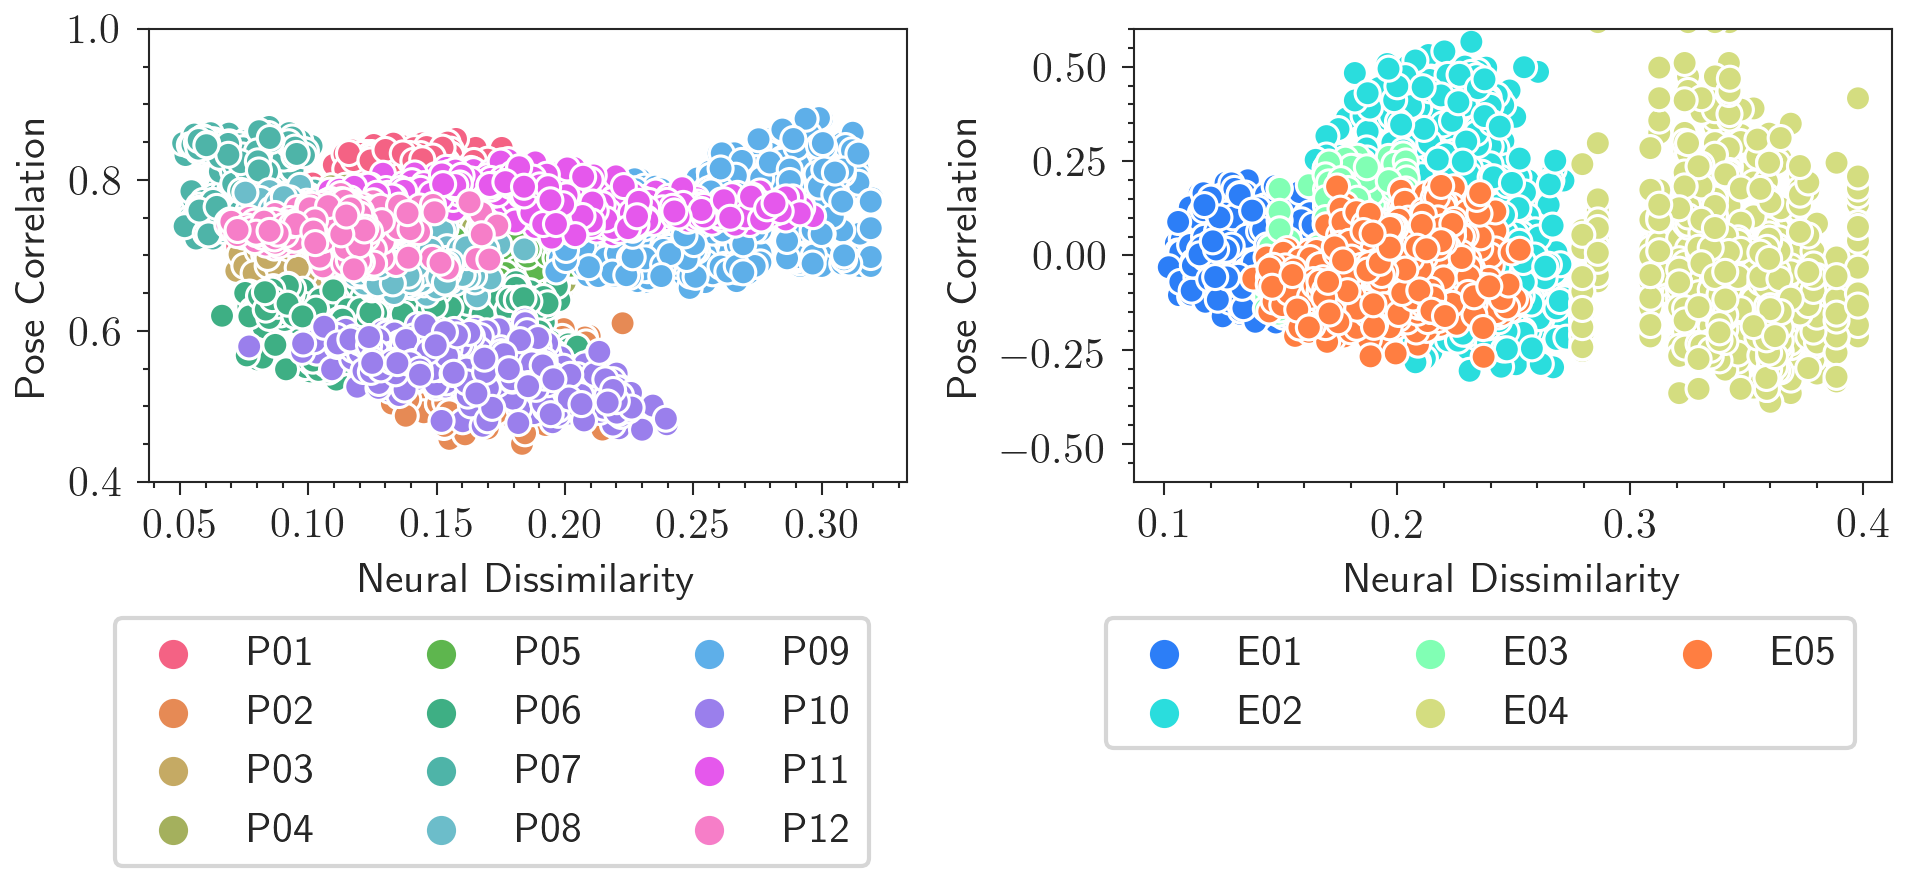

In [9]:
nat_cur_freq_df = nat_df[nat_df["Frequency"] == cur_freq]
exp_cur_freq_df = exp_df[exp_df["Frequency"] == cur_freq]

fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.0), dpi = 300)
plt.rcParams.update({"font.size": 10})
plt.subplots_adjust(wspace=0.3)

# plot just with points
sns.scatterplot(
    x=nat_cur_freq_df["Neural Dissimilarity"],
    y=nat_cur_freq_df["Pose Distance"],
    hue=nat_cur_freq_df["Participant"],
    ax=axes[0],
    palette=participant_colors,
)

axes[0].set_xlabel("Neural Dissimilarity")
axes[0].set_ylabel("Pose Correlation")
axes[0].set_ylim([0.4, 1])
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:], 
               labels=labels[1:], 
               bbox_to_anchor=(0.95, -0.3), 
               borderaxespad=0.0, 
               frameon=True, 
               ncol=3)

sns.scatterplot(
    x=exp_cur_freq_df["Neural Dissimilarity"],
    y=exp_cur_freq_df["Pose Distance"],
    hue=exp_cur_freq_df["Participant"],
    ax=axes[1],
    palette=exp_participant_colors,
)
# axes[1].set_xlabel("Neural Dissimilarity")
axes[1].set_ylabel("Pose Correlation")
axes[1].set_ylim([-0.6, 0.6])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:], 
               labels=labels[1:], 
               bbox_to_anchor=(0.95, -0.3), 
               borderaxespad=0.0, 
               frameon=True, 
               ncol=3)

plt.show()

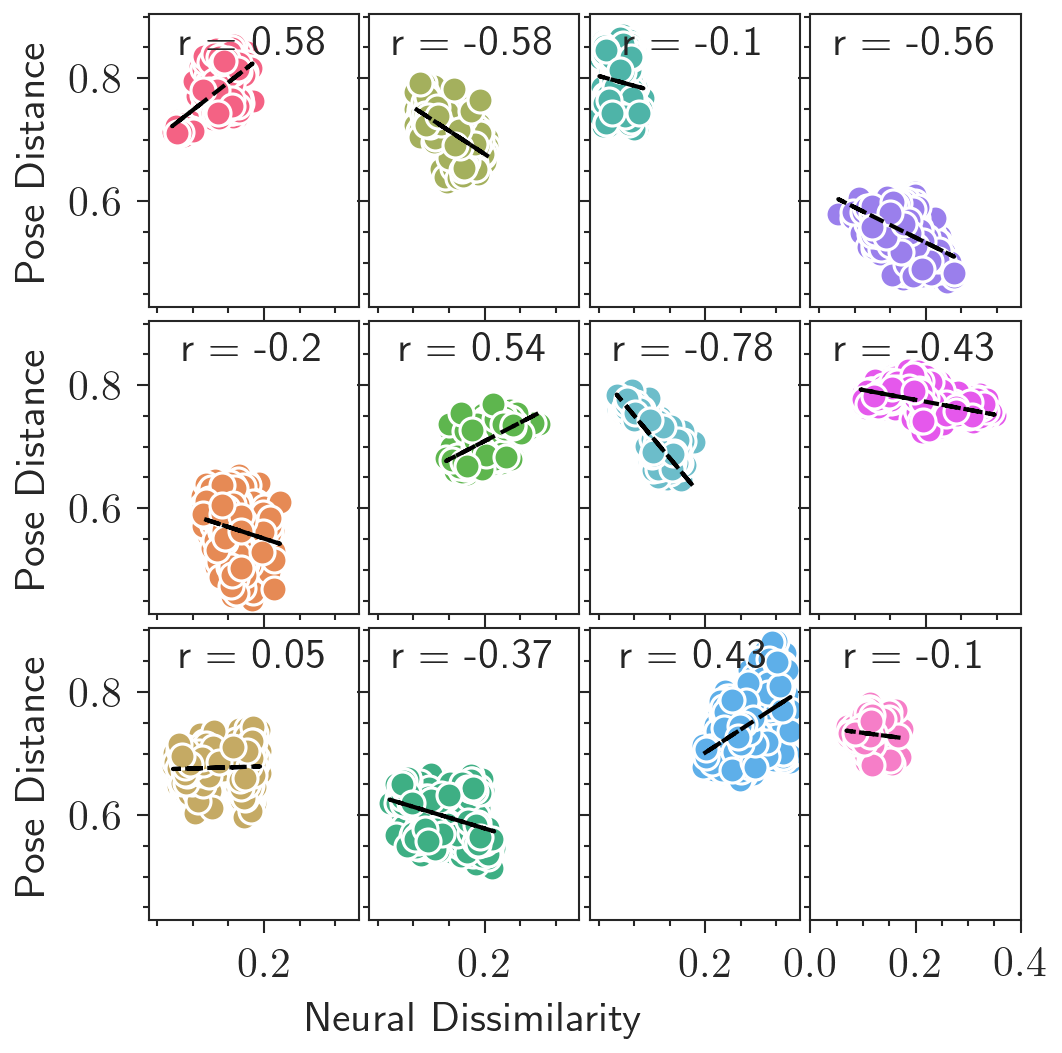

In [10]:
nat_cur_freq_df = nat_df[nat_df["Frequency"] == cur_freq]
exp_cur_freq_df = exp_df[exp_df["Frequency"] == cur_freq]

fig, axes = plt.subplots(3, 4, figsize=(7.5 / 2.0, 4), dpi = 300, sharey=True, sharex=True)
plt.rcParams.update({"font.size": 10})
# plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)


for p, pat in enumerate(nat_cur_freq_df["Participant"].unique()):
    ax_inds = [p % 3, p // 3]
    cur_participant_df = nat_cur_freq_df[nat_cur_freq_df["Participant"] == pat]
    sns.scatterplot(
        x=cur_participant_df["Neural Dissimilarity"],
        y=cur_participant_df["Pose Distance"],
        ax=axes[ax_inds[0], ax_inds[1]],
        color=participant_colors[pat],
    )
    
    z = np.polyfit(
        cur_participant_df["Neural Dissimilarity"], cur_participant_df["Pose Distance"], 1
    )
    p = np.poly1d(z)
    axes[ax_inds[0], ax_inds[1]].plot(
        cur_participant_df["Neural Dissimilarity"],
        p(cur_participant_df["Neural Dissimilarity"]),
        c='black',
        linestyle='--',
    )
    corr = stats.pearsonr(
        cur_participant_df["Neural Dissimilarity"],
        cur_participant_df["Pose Distance"],
    )
    plt.text(
        0.5,
        0.9,
        "r = " + str(round(corr[0], 2)),
        horizontalalignment="center",
        verticalalignment="center",
        transform=axes[ax_inds[0], ax_inds[1]].transAxes,
    )
    axes[ax_inds[0], ax_inds[1]].set_xlabel("")
    axes[ax_inds[0], ax_inds[1]].set_xticks([0.0, 0.2, 0.4])

axes[2, 1].set_xlabel("Neural Dissimilarity")
plt.show()

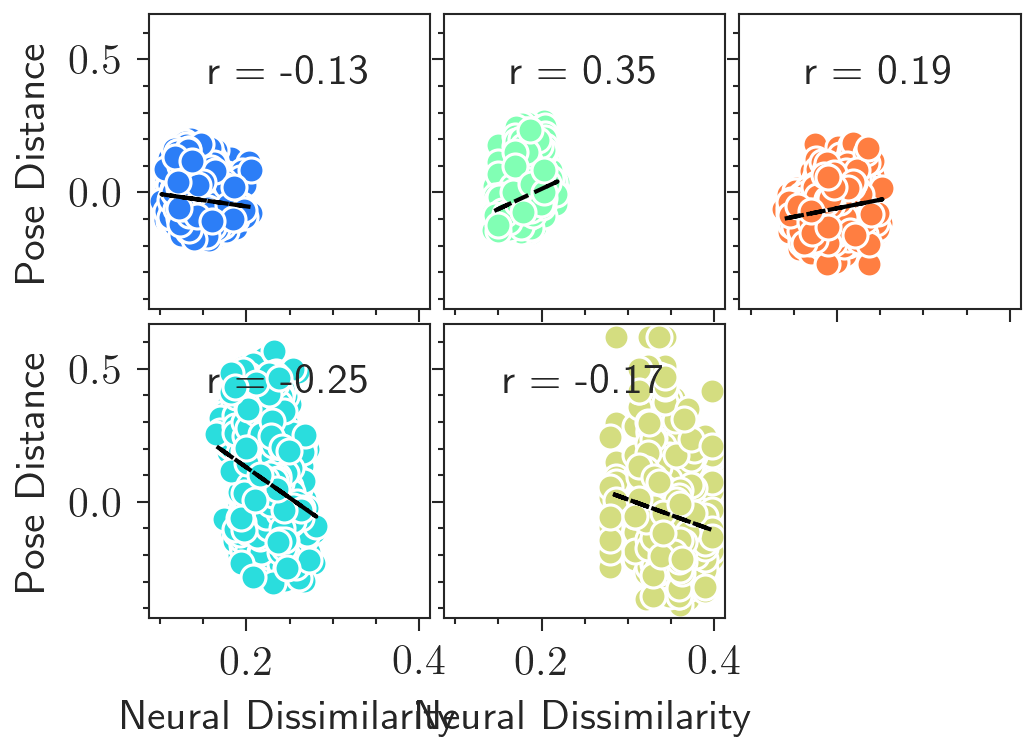

In [11]:
nat_cur_freq_df = nat_df[nat_df["Frequency"] == cur_freq]
exp_cur_freq_df = exp_df[exp_df["Frequency"] == cur_freq]

fig, axes = plt.subplots(2, 3, figsize=(7.5 / 2.0, 4 * (2/3)), dpi = 300, sharey=True, sharex=True)
plt.rcParams.update({"font.size": 10})
# plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)


for p, pat in enumerate(exp_cur_freq_df["Participant"].unique()):
    ax_inds = [p % 2, p // 2]
    cur_participant_df = exp_cur_freq_df[exp_cur_freq_df["Participant"] == pat]
    sns.scatterplot(
        x=cur_participant_df["Neural Dissimilarity"],
        y=cur_participant_df["Pose Distance"],
        ax=axes[ax_inds[0], ax_inds[1]],
        color=exp_participant_colors[pat],
    )
    
    z = np.polyfit(
        cur_participant_df["Neural Dissimilarity"], cur_participant_df["Pose Distance"], 1
    )
    p = np.poly1d(z)
    axes[ax_inds[0], ax_inds[1]].plot(
        cur_participant_df["Neural Dissimilarity"],
        p(cur_participant_df["Neural Dissimilarity"]),
        c='black',
        linestyle='--',
    )
    corr = stats.pearsonr(
        cur_participant_df["Neural Dissimilarity"],
        cur_participant_df["Pose Distance"],
    )
    axes[ax_inds[0], ax_inds[1]].text(
        0.25,
        0.45,
        "r = " + str(round(corr[0], 2)),
        horizontalalignment="center",
        verticalalignment="center",
        # transform=axes[ax_inds[0], ax_inds[1]].transAxes,
    )
    axes[ax_inds[0], ax_inds[1]].set_xlabel("Neural Dissimilarity")
    axes[ax_inds[0], ax_inds[1]].set_xticks([0.2, 0.4])

axes[-1, -1].set_visible(False)
plt.show()

In [12]:
print("Naturalistic Average Pose Distance:", np.round(nat_cur_freq_df['Pose Distance'].mean(), 3))
print("Naturalistic Average Pose Distance STD:", np.round(nat_cur_freq_df['Pose Distance Std'].mean(), 3))

Naturalistic Average Pose Distance: 0.698
Naturalistic Average Pose Distance STD: 0.129


In [13]:
print("Experimental Average Pose Distance:", np.round(exp_cur_freq_df['Pose Distance'].mean(), 3))
print("Experimental Average Pose Distance STD:", np.round(exp_cur_freq_df['Pose Distance Std'].mean(), 3))

Experimental Average Pose Distance: -0.018
Experimental Average Pose Distance STD: 0.078
